##### Use AustraliaFiltered.xlsx dataset generated earlier.

- Plot bar chart of total no of immigrants for countires top 5 countires having max no of total immigrants
- Find total immigrants from each category by area name and plot barchart for each area
- Plot total immigration trend(immigration of world over the years i.e. year vs Total count for that year) using line plot.
- Compare Immigration Trend for Asia, Africa and Europe AreaName (Use Line plot).
- Plot Total Immigrants based on DevelopmenRegion 

  
- Plot immigration trend for India using line plot
- Plot immigration Trend(year vs count) for the coutries with top 5 total immigrants. Use Line plot
- For the above use area plot with alpha = 0.5


- Compare Immigration Trend for top-5 countires using stacked area plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('AustraliaFiltered.xlsx')
df.nlargest(5,'Total')

,Country,AreaName,Region,DevName,1980,1981,1982,1983,1984,1985,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,Total
208,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,43540,57050,51730,31660,25150,27630,...,51000,52940,57330,70150,53140,53300,57250,61490,65160,1333340
143,New Zealand,Oceania,Australia and New Zealand,Developed regions,34370,34440,23920,13620,16900,27070,...,47230,45570,29500,28000,40710,44680,45550,39120,46960,898760
210,United States of America,Northern America,Northern America,Developed regions,10470,12080,12490,11110,11840,12480,...,18030,19230,18950,18980,18540,18490,17320,19260,20860,450370
42,"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,4170,4380,4980,5480,7450,6820,...,16410,18620,20200,19220,9740,10070,10270,9680,11030,388640
41,China,Asia,Eastern Asia,Developing regions,860,870,560,580,1220,2190,...,16700,22220,29000,33410,29860,28820,32190,42920,54300,387180


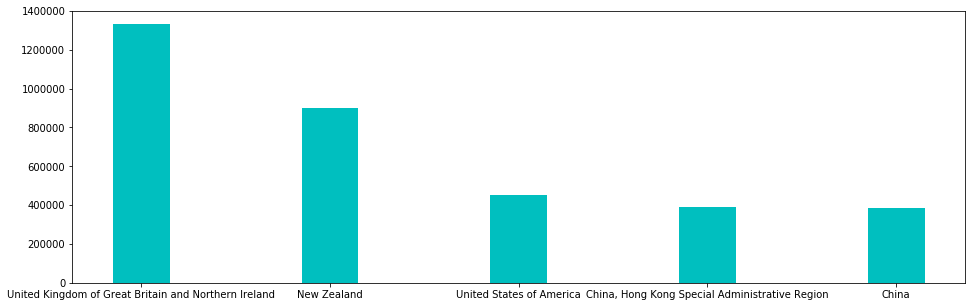

In [3]:
# Plot bar chart of total no of immigrants for countires top 5 countires having max no of total immigrants
ndf = df.nlargest(5,'Total')
x = ndf.Country
y = ndf.Total

plt.figure(figsize=(16,5))
plt.bar(x, y, color='c', width=0.3)
plt.show()

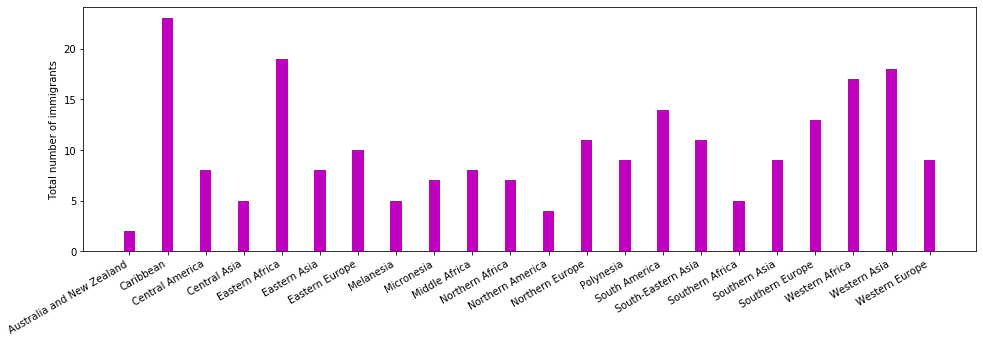

In [4]:
# Find total immigrants from each category by area name and plot barchart for each area

ndf = df[['Region','Total']].groupby(['Region']).size()
x = ndf.index
y = ndf.values
fig = plt.figure(figsize=(16,5))
plt.bar(x, y, color='m', width=0.3)
plt.ylabel('Total number of immigrants')
fig.autofmt_xdate()
plt.show()

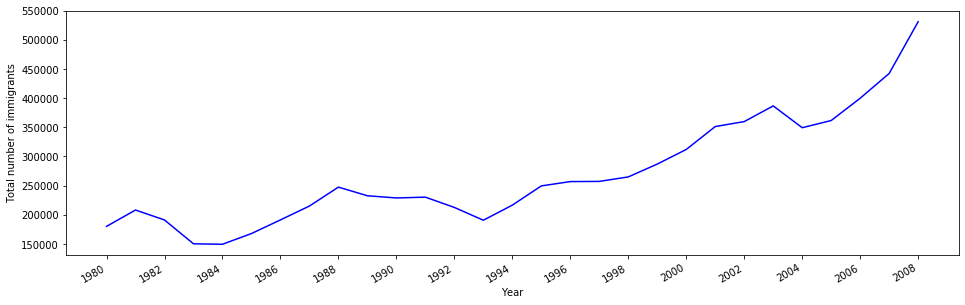

In [5]:
# Plot total immigration trend(immigration of world over the years i.e. year vs Total count for that year) using line plot.

ndf = df[df.columns[4:len(df.columns)-1]].sum()

x = ndf.index
y = ndf.values

fig = plt.figure(figsize=(16,5))
plt.plot(x,y, color='b')

# for i,j in zip(x,y):
#      plt.text(i,j,'({},{})'.format(i,j),verticalalignment='bottom')
plt.ylabel('Total number of immigrants')
plt.xlabel('Year')
plt.xticks(x[::2])
fig.autofmt_xdate()
plt.show()



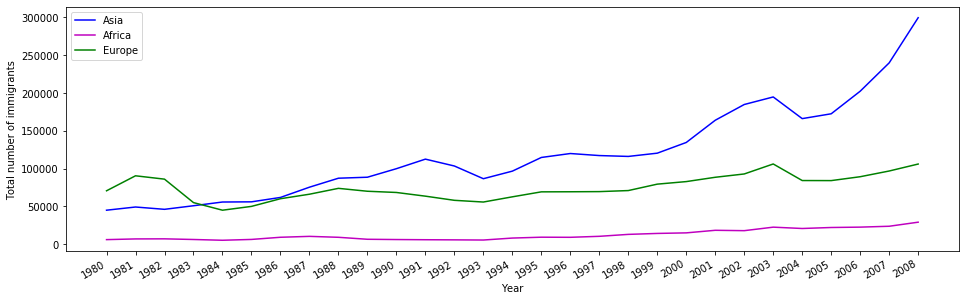

In [6]:
# Compare Immigration Trend for Asia, Africa and Europe AreaName (Use Line plot).

ndf1 = df[df.AreaName == 'Asia'][df.columns[4:len(df.columns)-1]].sum()
ndf2 = df[df.AreaName == 'Africa'][df.columns[4:len(df.columns)-1]].sum()
ndf3 = df[df.AreaName == 'Europe'][df.columns[4:len(df.columns)-1]].sum()
ndf3
x = ndf1.index
y1 = ndf1.values
y2 = ndf2.values
y3 = ndf3.values

fig = plt.figure(figsize=(16,5))
plt.plot(x,y1, color = 'b', label ="Asia")
plt.plot(x,y2, color = 'm', label = 'Africa' )
plt.plot(x,y3, color = 'g', label = 'Europe')
plt.legend()
plt.ylabel('Total number of immigrants')
plt.xlabel('Year')
plt.xticks(x)
fig.autofmt_xdate()
plt.show()



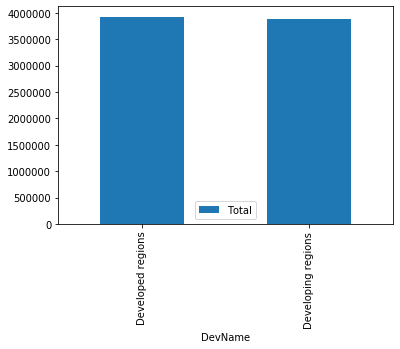

In [7]:
# Plot Total Immigrants based on DevelopmenRegion
df[['DevName','Total']].groupby(['DevName']).sum().plot.bar()


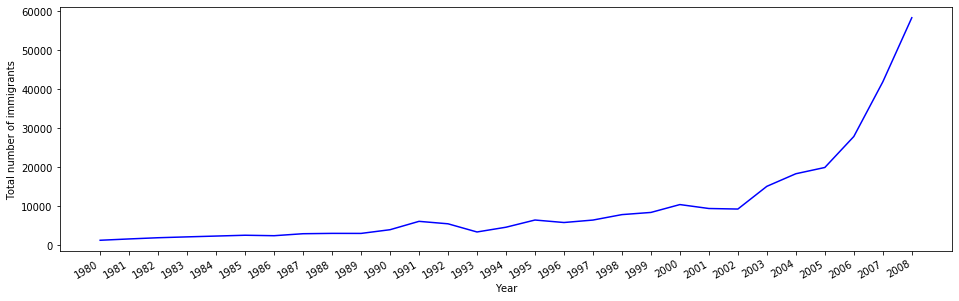

In [8]:
# Plot immigration trend for India using line plot
ndf = df[df.Country == 'India'][df.columns[4:len(df.columns)-1]].sum()

x = ndf.index
y = ndf.values


fig = plt.figure(figsize=(16,5))
plt.plot(x,y, color='b')

# # for i,j in zip(x,y):
# #      plt.text(i,j,'({},{})'.format(i,j),verticalalignment='bottom')
plt.ylabel('Total number of immigrants')
plt.xlabel('Year')

fig.autofmt_xdate()
plt.show()

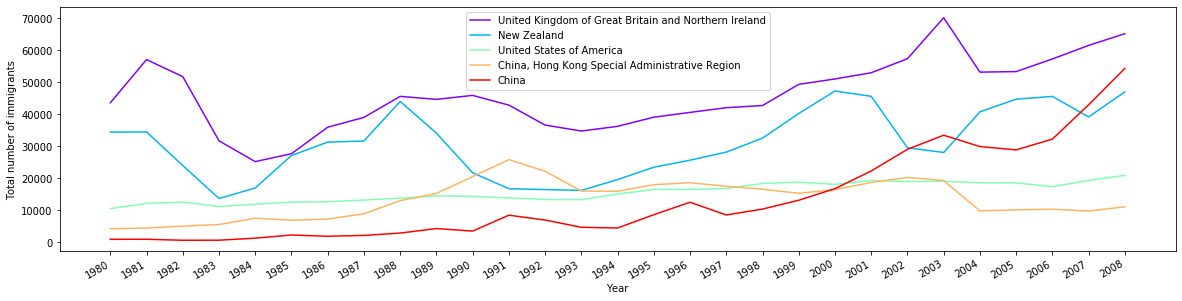

In [13]:
# Plot immigration Trend(year vs count) for the coutries with top 5 total immigrants. Use Line plot

from matplotlib.pyplot import cm
import numpy as np

nv = df.nlargest(5,'Total').Country

fig = plt.figure(figsize=(20,5))

color=iter(cm.rainbow(np.linspace(0,1,5)))

for i in nv.values:
    ndf = df[df.Country == '%s'%i][df.columns[4:len(df.columns)-1]].sum()
    x = ndf.index
    y = ndf.values
    c=next(color)
    plt.plot(x,y, color=c, label ="%s"%i)
    
plt.ylabel('Total number of immigrants')
plt.xlabel('Year')
plt.legend()
fig.autofmt_xdate()
plt.show()

# Alternet Solution:

# df.nlargest(5,'Total').groupby(['Country'])[df.columns[4:len(df.columns)-1]].sum().T.plot.line(figsize=(20,5))


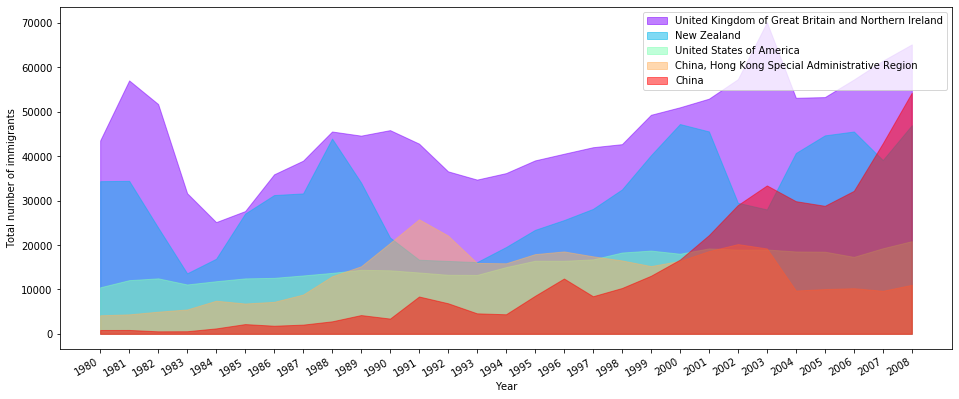

In [10]:
# For the above use area plot with alpha = 0.5
nv = df.nlargest(5,'Total').Country

fig = plt.figure(figsize=(16,7))

color=iter(cm.rainbow(np.linspace(0,1,5)))

for i in nv.values:
    ndf = df[df.Country == '%s'%i][df.columns[4:len(df.columns)-1]].sum()
    x = ndf.index
    y = ndf.values
    c=next(color)
    plt.fill_between(x,y, color=c, label ="%s"%i,alpha = .5)
    
plt.ylabel('Total number of immigrants')
plt.xlabel('Year')
plt.legend()
fig.autofmt_xdate()
plt.show()

# Alternet Solution:    

# df.nlargest(5,'Total').groupby(['Country'])[df.columns[4:len(df.columns)-1]].sum().T.plot.area(stacked=False,figsize=(20,5),alpha=.5)


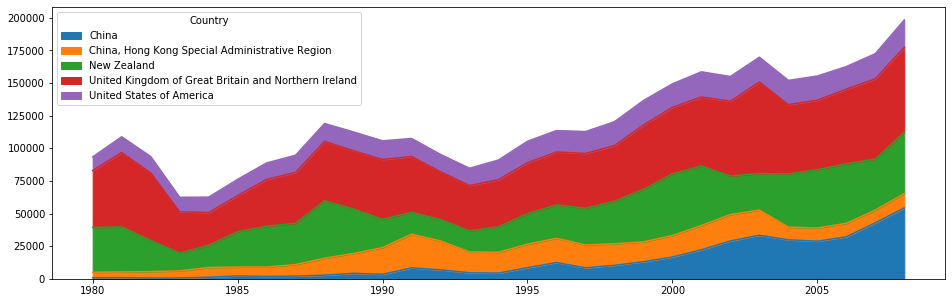

In [11]:
# Compare Immigration Trend for top-5 countires using stacked area plot

df.nlargest(5,'Total').groupby(['Country'])[df.columns[4:len(df.columns)-1]].sum().T.plot.area(stacked=True,figsize=(16,5))


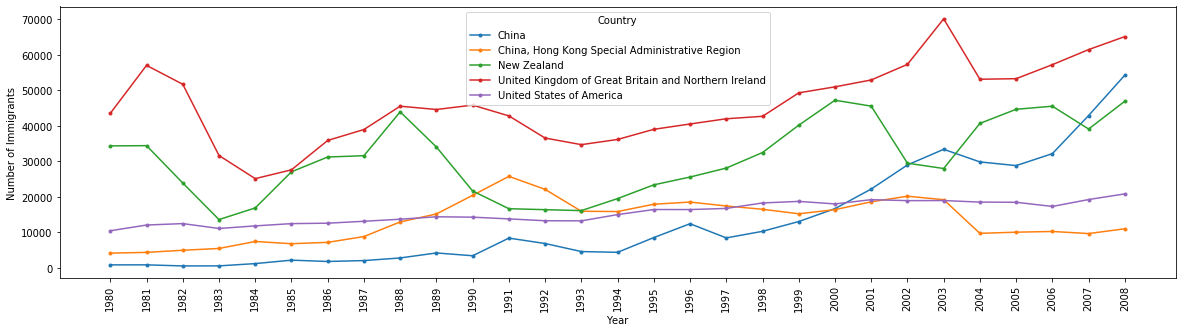

In [12]:
a = df.sort_values("Total", ascending=False).head()
b = a.groupby(by="Country").sum().loc[:,'1980':'2008']
c = b.unstack().unstack()

# plt.figure(figsize=(20,5))

c.plot(kind ="line", marker =".",figsize=(20,5))
plt.xticks(list(range(0, len(c))), list(range(1980,2009)), rotation = 90)
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

plt.show()